# Инструкция

Данный ноутбук предназначен для моделирования трещины по следующей модели:
- Разрез поверхности представлен в виде эллипса
- Сечение трещины вдоль трещины представляет собой параболу

Для моделирования необходимо задать параметры модели в разделе "Входные параметры".
Дальнейшие блоки не требуют изменения пользователем. После задание входных параметров и расчёта ноутбука пользователю предоставляются 3D модель трещины (в интересующий момент времени), а также проекции трещины по трём измерениям (проекции представлены в некоторые моменты наблюдения, заданные пользователем).

Пользователь может задать следующие параметры модели (обозначения указаны в разделе ниже):
- Начальные размеры трещины (длина, ширина, глубина)
- Размеры ограничивающей породы (то есть ограничения по осям x, y, z для отображения 3D модели и проекций)
- Скорости роста трещины по трём направлениям (так как предполагается, что трещина может расти, пользователь может задать скорость этих изменений)
- Интервал наблюдения за трещиной (для того, чтобы увидеть изменения в трещине с течением времени, пользователь может задать промежуток времени для наблюдения, а также количество проекций, которое будет построенл)
- Момент времени для построения проекции (3D отображение может быть построено в один конкретный момент, который может быть задан пользователем)

В разделе "Используемые библиотеки, функции и общие расчёты" представлены функции, необходимые для отображения. Данные функции не требуется изменять пользователю. Эти строки достаточно запустить во время расчётов для корректной отработки ноутбука.

В разделе "3D модель трещины в заданный момент времени" отображается 3D изображение трещины в тот момент времени, который указал пользователь.

В разделе "Сечения трещины в заданные промежутки наблюдения" представлены проекции трещины по трём измерениям. Каждая проекция отрисована в разные моменты времени, которые указаны пользователем. В легенде на каждом изображении указано, какая проекция соответсвует какому моменту времени.

# Обозначения

### Длины

a - длина трещины (длина эллипса), м

b - ширина трещины (ширина эллипса), м

c - глубина трещины (длина параболы), м

### Размер ограничевающей породы
d - длина породы (максимум по оси измерения a), м

e - ширина породы (максимум по оси измерения b), м

f - глубина породы (максимум по оси измерения c), м


### Скорости

Va - скорость роста длины трещины, м/час

Vb - скорость роста ширины трещины, м/час

Vc - скорость роста глубины трещины, м/час

### Время
 
t_start - время начала наблюдения для построения проекций

t_end - время конца наблюдения для построения проекций

Nt - количество интервалов времени, через которые будут проводиться наблюдения

t_3d - момент времени, для которого строится 3d модель

# Входные параметры

In [352]:
a = 10  # длина трещины (длина эллипса), м
b = 2  # ширина трещины (ширина эллипса), м
c = 5  # глубина трещины (длина параболы), м

d = 15  # длина породы (максимум по оси измерения a), м
e = 15  # ширина породы (максимум по оси измерения b), м
f = 15  # глубина породы (максимум по оси измерения c), м

Va = 0.1  # скорость роста длины трещины, м/час
Vb = 0.1  # скорость роста ширины трещины, м/час
Vc = 0.05  # скорость роста глубины трещины, м/час

t_start = 0  # время начала наблюдения для построения проекций
t_end = 48  # время конца наблюдения для построения проекций
Nt = 6  # количество интервалов времени, через которые будут проводиться наблюдения
t_3d = 1 # момент времени, для которого строится 3d модель


# Используемые библиотеки, функции и общие расчёты

In [353]:
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d.axes3d import Axes3D

In [354]:
# Функция перерасчёта параметров трещины
def change_crack(a, b, c, Va, Vb, Vc, t):
    return a + Va * t, b + Vb * t, c + Vc * t

In [355]:
# Функция построения эллиптического параболоида - фигуры, являющейся моделью трещины
def crack_3d(a, b, c):
    # a - длина трещины
    # b - ширина трещины
    # c - глубина скважины
    
    phi = np.linspace(0, 2*np.pi, 100)
    A = np.linspace(0, a/2, 100)
    B = np.linspace(0, b/2, 100)

    AA, _ = np.meshgrid(A, phi)
    BB, PHI = np.meshgrid(B, phi)
    X = AA*np.cos(PHI)
    Y = BB*np.sin(PHI)

    Z = ((X / (a/2))**2 + (Y / (b/2))**2)*c - c
    return X, Y, Z

In [356]:
# Функция визуализации сформированной 3D трещины в указанных границах объёма
def plot_crack_3d(X, Y, Z, d, e, f):
    fig = plt.figure(figsize=(8,6))

    ax = fig.add_subplot(1,1,1, projection='3d')
    ax.set_xlim([-d/2, d/2])
    ax.set_ylim([-e/2, e/2])
    ax.set_zlim([-f, 0])
    ax.plot_surface(X, Y, Z, rstride=4, cstride=4, alpha=0.25)

In [391]:
# Функция визуализации проекции XY
def plot_crack_XY(a, b, c, Va, Vb, Vc, T, d, e):
    T = np.linspace(t_start, t_end, Nt + 1)
    phi = np.linspace(0, 2*np.pi, 100)
    for t in T:
        aa, bb, cc = change_crack(a, b, c, Va, Vb, Vc, t) 
        x = (aa/2)*np.cos(phi)
        y = (bb/2)*np.sin(phi)
        plt.plot(x, y)
        
    plt.gca().legend(T, loc="upper left")
    plt.xlim(-d/2, d/2)
    plt.ylim(-e/2, e/2)
    

In [392]:
# Функция визуализации проекции XZ
def plot_crack_XZ(a, b, c, Va, Vb, Vc, T, d, f):
    T = np.linspace(t_start, t_end, Nt + 1)
    
    for t in T:
        aa, bb, cc = change_crack(a, b, c, Va, Vb, Vc, t) 
        x = np.linspace(-aa/2, aa/2, 100)
        z = ((x / (aa/2))**2)*cc - cc
        plt.plot(x, z)
    
    plt.gca().legend(T, loc="upper left")
    plt.xlim(-d/2, d/2)
    plt.ylim(-f, 0)

In [393]:
# Функция визуализации проекции YZ
def plot_crack_YZ(a, b, c, Va, Vb, Vc, T, e, f):
    T = np.linspace(t_start, t_end, Nt + 1)
    
    for t in T:
        aa, bb, cc = change_crack(a, b, c, Va, Vb, Vc, t) 
        y = np.linspace(-bb/2, bb/2, 100)
        z = ((y / (bb/2))**2)*cc - cc
        plt.plot(y, z)
    
    plt.gca().legend(T, loc="upper left")
    plt.xlim(-e/2, e/2)
    plt.ylim(-f, 0)

# 3D модель трещины в заданный момент времени

Параметры трещины спустя время наблюдения 1 (в часах)
a = 10.1
b = 2.1
c = 5.05


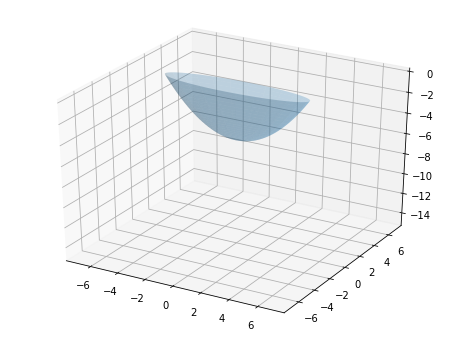

In [394]:
aa, bb, cc = change_crack(a, b, c, Va, Vb, Vc, t_3d)
print('Параметры трещины спустя время наблюдения', t_3d, '(в часах)')
print('a =', aa)
print('b =', bb)
print('c =', cc)
X, Y, Z = crack_3d(aa, bb, cc)
plot_crack_3d(X, Y, Z, d, e, f)

# Сечения трещины в заданные промежутки наблюдения

### Проекция трещины на плоскость OXY

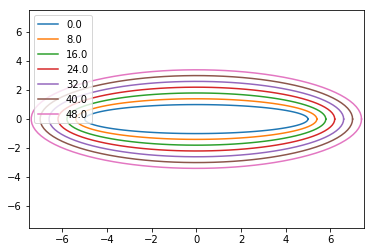

In [395]:
plot_crack_XY(a, b, c, Va, Vb, Vc, T, d, e)

### Проекция трещины на плоскость OXZ

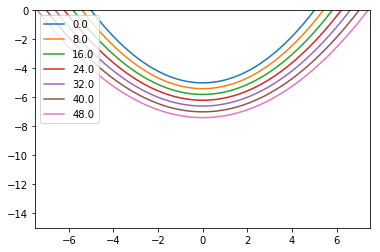

In [398]:
plot_crack_XZ(a, b, c, Va, Vb, Vc, T, d, f)

### Проекция трещины на плоскость OYZ

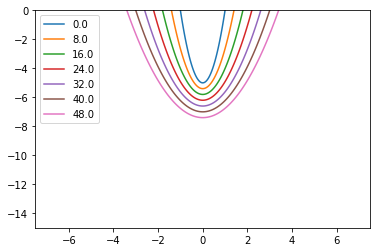

In [399]:
plot_crack_YZ(a, b, c, Va, Vb, Vc, T, e, f)